In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from BCI2kReader import BCI2kReader as b2k
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image as im
import os

In [6]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [7]:
def data_extraction_all(raw):
    combine_dataframe = []
    for i in range(16):
        mean = raw.values[i].mean() #mean setiap channel (channel = index array)
        combine_dataframe.append(mean)

        std = raw.values[i].std()
        combine_dataframe.append(std)

        snr = signaltonoise(raw.values[i])
        combine_dataframe.append(snr)
    #combine_dataframe.append(labels)
    final_dataframe = pd.DataFrame(combine_dataframe, index = ['FP1_mean', 'FP1_std', 'FP1_snr', 'F3_mean', 'F3_std', 'F3_snr', 'F7_mean', 'F7_std', 'F7_snr', 'T3_mean', 'T3_std', 'T3_snr','T5_mean', 'T5_std', 'T5_snr','O1_mean', 'O1_std', 'O1_snr','C4_mean', 'C4_std', 'C4_snr','FP2_mean', 'FP2_std', 'FP2_snr','Fz_mean', 'Fz_std', 'Fz_snr','F4_mean', 'F4_std', 'F4_snr','F8_mean', 'F8_std', 'F8_snr','C3_mean', 'C3_std', 'C3_snr','Cz_mean', 'Cz_std', 'Cz_snr','Pz_mean', 'Pz_std', 'Pz_snr','Oz_mean', 'Oz_std', 'Oz_snr','O2_mean', 'O2_std', 'O2_snr'])
    final_dataframe = pd.DataFrame.transpose(final_dataframe)
    final_dataframe.reset_index()
    return final_dataframe

In [9]:
filename = "./dataset/normal/Dhelal_Normal_15_6_2011S001R01.dat"
with b2k.BCI2kReader(filename) as test:
        my_states = test.read(-1)
        my_signals, stateslice = test[100:600]
        raw = pd.DataFrame(my_signals)

Text(0.5, 1.0, 'Autism EEG signal Signature')

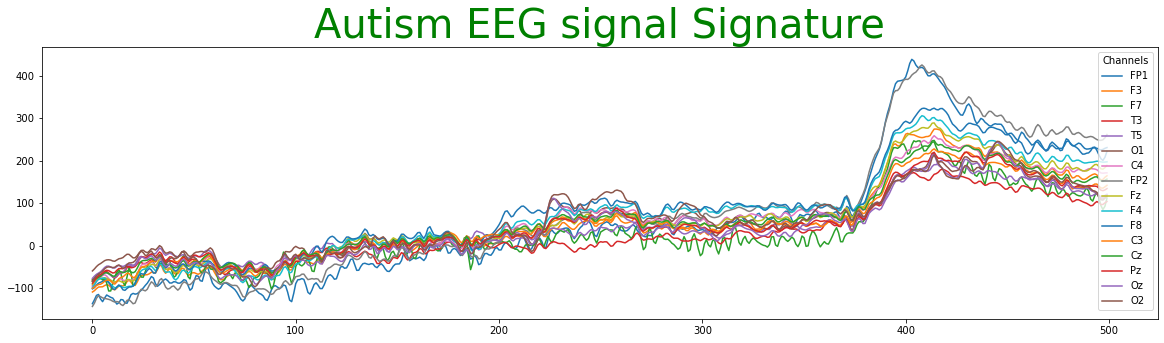

In [11]:
plot_normal_eeg = pd.DataFrame(my_signals)
plot_normal_eeg = pd.DataFrame.transpose(plot_normal_eeg)

plt.figure(figsize = (20,5))
plt.plot(plot_normal_eeg)
plt.legend(['FP1', 'F3', 'F7', 'T3', 'T5', 'O1', 'C4', 'FP2', 'Fz', 'F4', 'F8', 'C3', 'Cz', 'Pz', 'Oz', 'O2',],
            loc='upper right', title='Channels')
plt.title("Autism EEG signal Signature",  fontsize=40, color="green")